In [2]:
!pip install word2number


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [4]:
df = pd.read_csv(r"C:\Users\G.M.BHOOPESH\Desktop\ds\study materials\machine learning\hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
import math
median_of_test_score = math.floor(df['test_score(out of 10)'].median())
median_of_test_score

8

In [9]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_of_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [8]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [9]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [11]:
df['experience'] = df['experience'].fillna(median_of_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


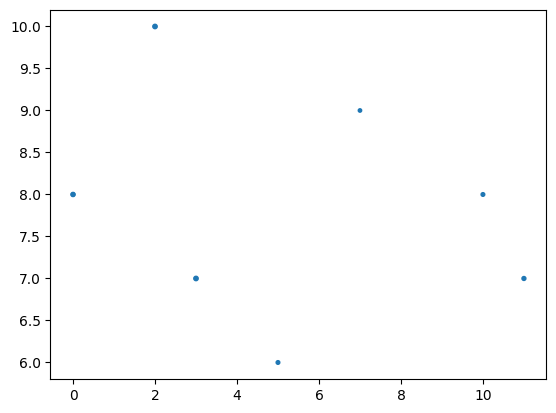

In [12]:
%matplotlib inline
plt.scatter(df.experience,df['test_score(out of 10)'],df['interview_score(out of 10)'])

In [13]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [14]:
reg.predict([[2,9,6]])

C:\Users\G.M.BHOOPESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [15]:
reg.predict([[12,10,10]])

C:\Users\G.M.BHOOPESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [20]:
import pickle

In [21]:
with open ('pickle_model','wb') as f:
    pickle.dump(reg,f)

In [23]:
with open ('pickle_model','rb') as f:
    template_model_pickle = pickle.load(f)

In [25]:
!pip install joblib


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import joblib
joblib.dump(reg,'joblib_model')

['joblib_model']

In [29]:
template_model_joblib = joblib.load('joblib_model')

In [35]:
template_model.predict([[9000, 132, 8973]])

C:\Users\G.M.BHOOPESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45365584.42503642])

In [34]:
template_model_joblib.predict([[9000, 132, 8973]])


C:\Users\G.M.BHOOPESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45365584.42503642])